### Logistic Regression
- Estimates the probability of an event occurring based on independent variables
- Models a binary outcome (True/False, Yes/No)
    - In this example, the outcome is either win or loss
- Equation: $$ f(x) = {e^{b} \over (1+e^{-x})} $$

### Prerequisite:
- Download Anaconda (https://www.anaconda.com/download)
- Install Github (https://gitforwindows.org/) (optional)
- Set up Github account (optional)
- Clone repository (git clone https://github.com/Krescenskok/DataScienceSessions.git) (optional)
- Useful git commands (https://git-scm.com/docs)

### Problem Statement and Hypothesis
- Research Question: Can the business predict opportunity outcomes?
- Alternate Hypothesis: Yes, we can predict opportunity outcomes
- Null Hypothesis: No, we cannot predict opportunity outcomes

### Why is it important to predict an opportunity with statistical significance?
- Anticipate sales for CST and other leadership
- Help influence a positive behavior


**Expected Outcome:** To have a model that can generalize trends in data using significant variables to predict a win or a loss.
- Understand which opportunity variables are most significant
- Figure out the accuracy of the model

**Data Collection Concerns:**
- Dataset needs to have at least 10,000 records to prevent bias
- At least 10 variables 
- At least 1 continuous and 1 categorical variable
- Rights to use the data

**Data Variables:**
- **Independent (x<sub>1</sub>-x<sub>n</sub>):** All other variables
- **Dependent (Y):** Stage (Categorical variable - Outcomes are only win or loss)
    - Logistic regressions are used to predict categorical outcomes

**Packages:**
- **pandas:** Used for dataframes
- **pyodbc:** Used to connect to SQL Server
- **sklearn/stats model API:** Used for our logistic model
    - Create train and test sets
    - Recursive feature elimination
    - Accuracy/precision/matrix scores
    - Receiver operator characteristic
- **seaborn/matplotlib:** Used for visualization

**Preprocessing Technique:**
- Import packages and load data
- Review the data
    - head(), info()
    - Handle missingness, outliers
- Exploratory analysis
- Variable selection

### Import Packages and load data

In [78]:
#import packages
import pyodbc as db
import pandas as pd

#connect to DB
server = 'tcp:usaepwvds025.database.windows.net' 
database = 'SIMS' 
username = 'ciaserviceaccount' 
password = 'pipeline$330' 
cnxn = db.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

#load dataframe
sql = "select * from sims.logisticRegression"
df = pd.read_sql(sql,cnxn)


C:\Users\EHIDRPC\AppData\Local\Temp\ipykernel_52144\1958964111.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql,cnxn)


### Review the data
- Understand data types (Continuous vs Categorical)
- Investigate missingness
- Scale
- Outliers

In [79]:
df.head()

,LegacySFInstance,LegacyAccountID,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyID,CurrentCompanyMarketCap,CurrentCompanyMarketCapCategory,Top12CMMCompany,Top24CMMCompany,OpportunityID,OpportunityName,OpportunityType,TotalOpportunityAmount,CreateDate,StartDate,OpportunityOwner,StageName,CloseReason,CloseComments,ImpactedFY
0,RxC,0013s00000uY8t8AAC,"Coram Speciality Infusion Services, Inc.","Coram Speciality Infusion Services, Inc.",NaN,NaN,None,None,None,0063s00000DSJH9AAP,Coram/CVS Copay Finder,New,NaN,2019-08-06 19:15:55,None,Andrew Burman,Closed Lost,No Bid,Nothing materialized with the client.,FY 2020
1,RxC,0013s00000xIwQOAA0,Caris-MPI,Caris-MPI,NaN,NaN,None,None,None,0063s00000EAht5AAD,Precision Medicine Survey,New,200000.0,2017-05-31 15:15:14,None,Jennifer Frytak,Closed Lost,Client Funding Cut,None,FY 2018
2,RxC,0013s00000zTk3cAAC,Pharma Pac,Pharma Pac,NaN,NaN,None,None,None,0063s00000DUuUEAA1,Pharma Pac,New,173838.0,2020-04-09 15:52:13,2021-04-12,Ryan Grimmett,Closed Lost,Cancelled,None,FY 2022
3,RxC,0013s000011ZefwAAC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,NaN,NaN,None,None,None,0063s00000EwxCLAAZ,Biologics RARE - Launched for FY22 Tracking,Renewal,44986789.0,2021-02-04 14:55:41,2021-04-01,Laura Sieve,Closed Won,None,None,FY 2022
4,RxC,0013s000011ZefwAAC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,NaN,NaN,None,None,None,0063s00000ExCSbAAN,Biologics ONC - Launched for FY22 Tracking,Renewal,18086000.0,2021-04-27 15:01:37,2021-04-01,Laura Sieve,Closed Won,None,None,FY 2022


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   LegacySFInstance                 27528 non-null  object        
 1   LegacyAccountName                27508 non-null  object        
 2   CurrentCompanyGroup              27508 non-null  object        
 3   CurrentCompanyMarketCap          23076 non-null  float64       
 4   CurrentCompanyMarketCapCategory  27451 non-null  object        
 5   Top12CMMCompany                  10023 non-null  object        
 6   Top24CMMCompany                  4450 non-null   object        
 7   OpportunityName                  27528 non-null  object        
 8   OpportunityType                  27528 non-null  object        
 9   TotalOpportunityAmount           26194 non-null  float64       
 10  CreateDate                       27528 non-null  datetime6

#### Drop ID Columns
- Looking for patterns in the data. Since the ID columns are unique, this won't help us in predicting our win/loss opportunities

In [80]:
df = df.drop(columns=['LegacyAccountID', 'CurrentCompanyID', 'OpportunityID'])

We can't impute comments, so we will drop `CloseComments` from our dataset

In [81]:
df = df.drop(columns = 'CloseComments')

Since we have `CreateDate` that have no null values, we will use this column and drop `StartDate`

In [82]:
df = df.drop(columns = 'StartDate')

In [83]:
df.query('LegacyAccountName != LegacyAccountName')

,LegacySFInstance,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyMarketCap,CurrentCompanyMarketCapCategory,Top12CMMCompany,Top24CMMCompany,OpportunityName,OpportunityType,TotalOpportunityAmount,CreateDate,OpportunityOwner,StageName,CloseReason,ImpactedFY
57,CMM,None,None,NaN,None,None,None,MDD Xadago (Safinamide) Prior Authorization Pl...,Renewal,105250.00,2020-03-02 15:53:43,Amanda Tegeder,Closed Won,None,FY 2022
58,CMM,None,None,NaN,None,None,None,MDD Xadago (Safinamide) Prior Authorization Pl...,Renewal,105125.00,2021-05-10 17:42:46,David Prevo,Closed Won,None,FY 2023
59,CMM,None,None,NaN,None,None,None,MDD Xadago (Safinamide) HubExpress,New,148435.00,2021-04-19 14:40:04,Josh Lobs,Closed Lost,Budget,FY 2022
60,CMM,None,None,NaN,None,None,None,MDD Xadago (Safinamide) Prior Authorization Pl...,Renewal,90575.00,2022-05-26 16:39:30,David Prevo,Closed Won,None,FY 2024
61,CMM,None,None,NaN,None,None,None,testpharma Brand 1 Test Prior Authorization Pl...,Renewal,50010.00,2019-01-03 21:30:43,Julie Fielding,Closed Lost,None,FY 2019
62,CMM,None,None,NaN,None,None,None,testpharma Brand4 IAN,New,350000.00,2020-10-30 13:44:15,Julie Fielding,Closed Lost,No Bid,FY 2021
63,CMM,None,None,NaN,None,None,None,testpharma Brand 1 Test Provider Medication Al...,New,15.00,2021-02-02 16:27:41,Julie Fielding,Closed Lost,No Bid,FY 2021
64,CMM,None,None,NaN,None,None,None,testpharma BrandABC Prior Authorization Plus,New,1740232.24,2021-10-29 14:21:29,Jason Kemble,Closed Lost,No Bid,FY 2022
65,CMM,None,None,NaN,None,None,None,testpharma BB TEST BRAND Prior Authorization Plus,New,198042.50,2021-11-30 19:44:20,Caroline Savoy,Closed Lost,No Bid,FY 2022
66,CMM,None,None,NaN,None,None,None,testpharma BB TEST BRAND Prior Authorization Plus,New,174042.50,2021-11-30 20:01:53,Caroline Savoy,Closed Lost,No Bid,FY 2022


In [84]:
df.dropna(subset=['LegacyAccountName'], inplace=True)

Impute a value for missing market caps
- Average value in the market cap category
- Some companies don't have a market cap category, so we will first impute market cap categories

In [85]:
modeMarketCap = df['CurrentCompanyMarketCapCategory'].mode()
print(modeMarketCap)
df['CurrentCompanyMarketCapCategory'].fillna(df['CurrentCompanyMarketCapCategory'].mode()[0], inplace=True)

0    Large
Name: CurrentCompanyMarketCapCategory, dtype: object


In [86]:
meanMarketCap = df.groupby('CurrentCompanyMarketCapCategory')['CurrentCompanyMarketCap'].mean().reset_index()
print(meanMarketCap)
totalMeanMarketCap = df['CurrentCompanyMarketCap'].mean()
print(totalMeanMarketCap)

  CurrentCompanyMarketCapCategory  CurrentCompanyMarketCap
0                           Large             8.923380e+10
1                          Medium             5.180624e+09
2                            Mega             3.616713e+11
3                           Micro             8.615721e+07
4                   Not Available                      NaN
5                         Private                      NaN
6                           Small             1.121986e+09
133175951034.47264


In [87]:
df['CurrentCompanyMarketCap'] = df['CurrentCompanyMarketCap'].fillna(df.groupby('CurrentCompanyMarketCapCategory')['CurrentCompanyMarketCap'].transform('mean'))

In [88]:
df['CurrentCompanyMarketCap'].fillna(totalMeanMarketCap, inplace = True)

In [89]:
df['Top12CMMCompany'].fillna('False', inplace = True)
df['Top24CMMCompany'].fillna('False', inplace = True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27508 entries, 0 to 27527
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   LegacySFInstance                 27508 non-null  object        
 1   LegacyAccountName                27508 non-null  object        
 2   CurrentCompanyGroup              27508 non-null  object        
 3   CurrentCompanyMarketCap          27508 non-null  float64       
 4   CurrentCompanyMarketCapCategory  27508 non-null  object        
 5   Top12CMMCompany                  27508 non-null  object        
 6   Top24CMMCompany                  27508 non-null  object        
 7   OpportunityName                  27508 non-null  object        
 8   OpportunityType                  27508 non-null  object        
 9   TotalOpportunityAmount           26179 non-null  float64       
 10  CreateDate                       27508 non-null  datetime64[ns]

In [91]:
avgTotalOppAmt = df['TotalOpportunityAmount'].mean()
print(avgTotalOppAmt)
df['TotalOpportunityAmount'].fillna(avgTotalOppAmt, inplace = True)

748139.9005492954


In [92]:
CloseReasonMode = df['CloseReason'].mode()
print(CloseReasonMode)

df.loc[(df['CloseReason'].isna()) & (df['StageName'] == "Closed Lost"), 'CloseReason'] = "CloseReasonMode"

df.loc[(df['CloseReason'].isna()) & (df['StageName'] == "Closed Won"), 'CloseReason'] = "Won"


0    No Bid
Name: CloseReason, dtype: object


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27508 entries, 0 to 27527
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   LegacySFInstance                 27508 non-null  object        
 1   LegacyAccountName                27508 non-null  object        
 2   CurrentCompanyGroup              27508 non-null  object        
 3   CurrentCompanyMarketCap          27508 non-null  float64       
 4   CurrentCompanyMarketCapCategory  27508 non-null  object        
 5   Top12CMMCompany                  27508 non-null  object        
 6   Top24CMMCompany                  27508 non-null  object        
 7   OpportunityName                  27508 non-null  object        
 8   OpportunityType                  27508 non-null  object        
 9   TotalOpportunityAmount           27508 non-null  float64       
 10  CreateDate                       27508 non-null  datetime64[ns]

In [94]:
df['CreateDateMonth'] = df['CreateDate'].dt.month 

In [95]:
display(df)

,LegacySFInstance,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyMarketCap,CurrentCompanyMarketCapCategory,Top12CMMCompany,Top24CMMCompany,OpportunityName,OpportunityType,TotalOpportunityAmount,CreateDate,OpportunityOwner,StageName,CloseReason,ImpactedFY,CreateDateMonth
0,RxC,"Coram Speciality Infusion Services, Inc.","Coram Speciality Infusion Services, Inc.",8.923380e+10,Large,False,False,Coram/CVS Copay Finder,New,7.481399e+05,2019-08-06 19:15:55,Andrew Burman,Closed Lost,No Bid,FY 2020,8
1,RxC,Caris-MPI,Caris-MPI,8.923380e+10,Large,False,False,Precision Medicine Survey,New,2.000000e+05,2017-05-31 15:15:14,Jennifer Frytak,Closed Lost,Client Funding Cut,FY 2018,5
2,RxC,Pharma Pac,Pharma Pac,8.923380e+10,Large,False,False,Pharma Pac,New,1.738380e+05,2020-04-09 15:52:13,Ryan Grimmett,Closed Lost,Cancelled,FY 2022,4
3,RxC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,8.923380e+10,Large,False,False,Biologics RARE - Launched for FY22 Tracking,Renewal,4.498679e+07,2021-02-04 14:55:41,Laura Sieve,Closed Won,Won,FY 2022,2
4,RxC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,8.923380e+10,Large,False,False,Biologics ONC - Launched for FY22 Tracking,Renewal,1.808600e+07,2021-04-27 15:01:37,Laura Sieve,Closed Won,Won,FY 2022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27523,RHP,Biocon Biologics Inc.,Biocon Biologics Inc.,1.331760e+11,Not Available,False,False,Biocon Biologics_TS SOW,New,6.298000e+04,2023-06-14 21:23:02,Laura Redman,Closed Won,Won,FY 2024,6
27524,RHP,Biocon Biologics Inc.,Biocon Biologics Inc.,1.331760e+11,Not Available,False,False,"Biocon Biologics_State Insulin Prog (MN, CO, ME)",New,1.175200e+05,2023-06-29 23:19:29,Laura Redman,Closed Won,Won,FY 2024,6
27525,RHP,Biocon Biologics Inc.,Biocon Biologics Inc.,1.331760e+11,Not Available,False,False,"Biocon Biologics_LS, TS & State Insulin Imp SOW",New,0.000000e+00,2023-06-29 23:25:26,Laura Redman,Closed Won,Won,FY 2024,6
27526,RHP,Biocon Biologics Inc.,Biocon Biologics Inc.,1.331760e+11,Not Available,False,False,"Biocon Biologics_State Insulin Prog (MN, CO, M...",New,0.000000e+00,2024-01-15 17:36:03,Laura Redman,Closed Lost,No Bid,FY 2024,1


## Outliers
- Outliers can skew the results of data analysis and impact model performance
- Handling Outliers: 
    - Remove
    - Impute
    - Scale/Standardize

In [96]:
df.describe()

,CurrentCompanyMarketCap,TotalOpportunityAmount,CreateDate,CreateDateMonth
count,2.750800e+04,2.750800e+04,27508,27508.000000
mean,1.330849e+11,7.481399e+05,2018-01-09 13:16:36.709248256,6.538316
min,6.493000e+01,-2.800000e+06,2008-03-17 18:16:52,1.000000
25%,1.434807e+10,5.445000e+03,2015-06-19 15:57:31,4.000000
50%,1.174317e+11,8.000000e+04,2018-09-17 22:26:58,7.000000
75%,1.576153e+11,3.201000e+05,2021-03-01 18:16:57.500000,9.000000
max,6.998863e+11,1.188350e+09,2024-02-19 20:48:25,12.000000
std,1.496705e+11,1.265793e+07,NaN,3.276847


In [101]:
df['CreateDateMonth'] = df['CreateDateMonth'].astype('object')
df['StageName'] = df['StageName'].astype('object')

In [122]:
df.describe(include='object')

,LegacySFInstance,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyMarketCapCategory,Top12CMMCompany,Top24CMMCompany,OpportunityName,OpportunityType,OpportunityOwner,StageName,CloseReason,ImpactedFY,CreateDateMonth
count,27508,27508,27508,27508,27508,27508,27508,27508,27508,27508,27508,27508,27508
unique,3,1628,919,7,2,2,25829,3,249,2,76,23,12
top,RxC,"Merck & Co., Inc.",Bristol Myers Squibb,Large,False,False,2016 Mid-America Cancer Symposium,New,Admin User,Closed Won,Won,FY 2023,9
freq,15084,845,1487,11747,17485,23058,36,19518,2532,15376,13361,2838,3087


In [105]:
## Customize percentiles
df.describe(percentiles=[.01, .05, .1, .25, .5, .75, .90, .95, .99])  

,CurrentCompanyMarketCap,TotalOpportunityAmount,CreateDate
count,2.750800e+04,2.750800e+04,27508
mean,1.330849e+11,7.481399e+05,2018-01-09 13:16:36.709248256
min,6.493000e+01,-2.800000e+06,2008-03-17 18:16:52
1%,9.376078e+05,0.000000e+00,2008-05-19 20:03:47.160000
5%,1.477488e+08,0.000000e+00,2010-03-10 04:13:26.450000128
10%,1.164934e+09,0.000000e+00,2011-12-22 08:48:33.300000
25%,1.434807e+10,5.445000e+03,2015-06-19 15:57:31
50%,1.174317e+11,8.000000e+04,2018-09-17 22:26:58
75%,1.576153e+11,3.201000e+05,2021-03-01 18:16:57.500000
90%,3.055616e+11,8.022188e+05,2022-09-22 15:38:40.500000


In [106]:
import seaborn as sb
import statsmodels.api as sm

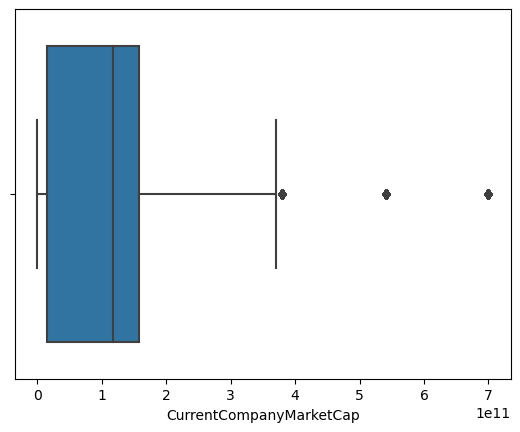

In [120]:
marketCapBox = sb.boxplot(x='CurrentCompanyMarketCap',data=df) 
#Decision: Use min max scalar to scale the data to remove the impactive outliers

## Exploratory Data Analysis
- Data Visualization

In [121]:
df['StageName'].value_counts()

StageName
Closed Won     15376
Closed Lost    12132
Name: count, dtype: int64

<Axes: xlabel='StageName'>

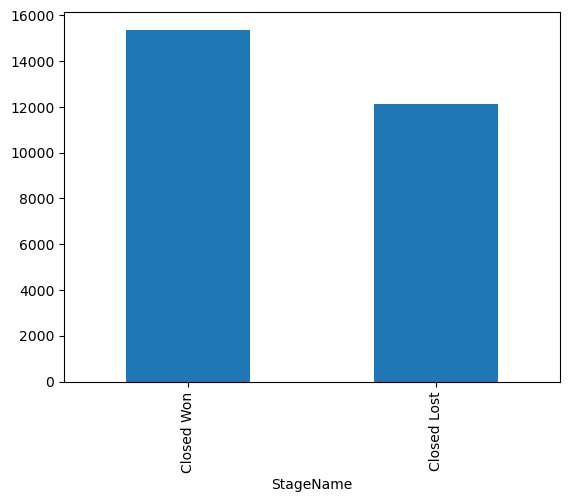

In [123]:
df['StageName'].value_counts().plot(kind='bar')

## Encoding
- Model cannot interpret strings, so we need to encode all the variables as numbers
- dummy variables
- Curse of dimensionality 

In [129]:
df['StageName'] = df['StageName'].map({'Closed Won': 1, 'Closed Lost': 0})

In [130]:
winRate = (sum(df['StageName'])/len(df['StageName'].index))*100
print(winRate)

55.89646648247783


In [131]:
df = pd.get_dummies(df, columns=["LegacySFInstance", "CurrentCompanyMarketCapCategory", "Top12CMMCompany", "Top24CMMCompany", "OpportunityType","ImpactedFY", "CreateDateMonth"], prefix=["LegacySFInstance", "CurrentCompanyMarketCapCategory", "Top12CMMCompany", "Top24CMMCompany", "OpportunityType","ImpactedFY", "CreateDateMonth"], drop_first=True)     

In [132]:
df.head()

,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyMarketCap,OpportunityName,TotalOpportunityAmount,CreateDate,OpportunityOwner,StageName,CloseReason,LegacySFInstance_RHP,...,CreateDateMonth_3,CreateDateMonth_4,CreateDateMonth_5,CreateDateMonth_6,CreateDateMonth_7,CreateDateMonth_8,CreateDateMonth_9,CreateDateMonth_10,CreateDateMonth_11,CreateDateMonth_12
0,"Coram Speciality Infusion Services, Inc.","Coram Speciality Infusion Services, Inc.",8.923380e+10,Coram/CVS Copay Finder,7.481399e+05,2019-08-06 19:15:55,Andrew Burman,0,No Bid,False,...,False,False,False,False,False,True,False,False,False,False
1,Caris-MPI,Caris-MPI,8.923380e+10,Precision Medicine Survey,2.000000e+05,2017-05-31 15:15:14,Jennifer Frytak,0,Client Funding Cut,False,...,False,False,True,False,False,False,False,False,False,False
2,Pharma Pac,Pharma Pac,8.923380e+10,Pharma Pac,1.738380e+05,2020-04-09 15:52:13,Ryan Grimmett,0,Cancelled,False,...,False,True,False,False,False,False,False,False,False,False
3,Biologics Financial Reconciliation,Biologics Financial Reconciliation,8.923380e+10,Biologics RARE - Launched for FY22 Tracking,4.498679e+07,2021-02-04 14:55:41,Laura Sieve,1,Won,False,...,False,False,False,False,False,False,False,False,False,False
4,Biologics Financial Reconciliation,Biologics Financial Reconciliation,8.923380e+10,Biologics ONC - Launched for FY22 Tracking,1.808600e+07,2021-04-27 15:01:37,Laura Sieve,1,Won,False,...,False,True,False,False,False,False,False,False,False,False
